In [439]:
from pymystem3 import Mystem
mystem = Mystem()
from string import punctuation
import re
import os
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import numpy as np
import nltk
import re
from math import *

In [440]:
def read_file(name_file):
    f = open(name_file, 'r')
    f_r = f.read()
    return f_r

In [441]:
def remove_tags(text):
    no_tags_text = re.sub(r'<[^>]+>', ' ', text)
    no_space_sequences_text = re.sub('  +', ' ', no_tags_text)
    return no_space_sequences_text

In [442]:
def remove_sites(text):
    no_sites_text = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)*\/?\S', ' ', text, flags=re.MULTILINE)
    no_space_sequences_text = re.sub('  +', ' ', no_sites_text)
    return no_space_sequences_text

In [443]:
file_paths_lst = []
for root, dirs, files in os.walk('/Users/irene/Downloads/HW1/texts'):  
    for filename in files:
        path = '/Users/irene/Downloads/HW1/texts/' + filename
        file_paths_lst.append(path)

In [444]:
file_paths_lst[0:10]

['/Users/irene/Downloads/HW1/texts/100_1.txt',
 '/Users/irene/Downloads/HW1/texts/100_10.txt',
 '/Users/irene/Downloads/HW1/texts/100_2.txt',
 '/Users/irene/Downloads/HW1/texts/100_3.txt',
 '/Users/irene/Downloads/HW1/texts/100_4.txt',
 '/Users/irene/Downloads/HW1/texts/100_5.txt',
 '/Users/irene/Downloads/HW1/texts/100_6.txt',
 '/Users/irene/Downloads/HW1/texts/100_7.txt',
 '/Users/irene/Downloads/HW1/texts/100_8.txt',
 '/Users/irene/Downloads/HW1/texts/100_9.txt']

# 1.1

## Ключевые слова выделены жирным курсивом.

 Российская газета 
   Автор: Наталья Козлова 
Регион: Общероссийский выпуск 
  
Появился новый  **свидетель** **ДТП**, в котором  **погибла** Марина **Голуб**
     После санкции суда на арест виновника аварии, в которой погибла 
известная **актриса**, можно утверждать, что расследование пошло полным ходом. 
     Сразу после первых очных ставок стало понятно - очевидцы страшной 
**аварии** на юго-западе Москвы опознали 31-летнего Алексея Русакова как 
водителя автомобиля, протаранившего авто, в котором ехала актриса Марина 
Голуб. Об этом сообщил следователь в Тверском районном суде Москвы, когда 
попросил у суда санкции на арест Русакова. 
     А вчера все информагентства распространили слова одного из ключевых 
свидетелей по делу. Как рассказал водитель машины, которая пострадала в том 
же ДТП, где погибла Голуб, автомобиль с актрисой начал движение на 
перекрестке чуть раньше, чем на светофоре загорелся зеленый. Русаков 
утверждает, что начал движение на желтый и газанул, чтобы завершить маневр. 
Со слов еще одного потерпевшего выходило, что его автомобиль двигался 
навстречу машине с актрисой, и если бы он поехал чуть раньше, то виновник 
аварии врезался бы в него. 
     Интернет тут же взорвался комментариями этих слов, большинство из 
которых сводилось к нехитрой формуле - адвокаты договорились и теперь будут 
выгораживать **виновника** аварии. Действительно ли подобные показания, когда 
правила нарушили оба водителя, могут повлиять на результаты расследования? 
     Ну, во-первых, пока слова свидетеля и потерпевшего всего лишь слова. 
Их оценку еще предстоит дать и следствию, и потом **суду**. Но одних слов для 
перевода аварии в "обоюдное" неправильное действие мало. Это должны 
подтвердить несколько экспертиз. В первую очередь автотехническая. 
Специалисты должны снять показания светофора и составить схему-график, из 
которой будет понятно, кто когда и куда ехал. 
      Свое слово скажет и экспертное заключение картинки с камер 
видеонаблюдения. Напомним, авария попала, пусть не полностью, в объективы 
камер. Так что появление свидетеля с другой версией еще ровным счетом 
ничего не значит. А все журналисты ухватились за новые детали, не 
выгораживая виновника аварии, а лишь потому, что следствие ушло в глухую 
защиту, не считая возможным сообщать общественности о расследовании, 
которое сегодня волнует очень многих. Русаков уже заявил, что признает свою 
вину, и попросил прощения у родных погибших. Но продолжает настаивать на 
том, что его появление на людях - это явка с повинной. Следствие не 
согласно. 
     Пока лихачу предъявили обвинение по двум статьям УК. Невесту Русакова 
подозревают в укрывательстве. Но ей пока ничего не предъявили. 
 
 Школьникам сделают социальную сеть и поисковик  

In [445]:
ws = ['свидетель', 'ДТП', 'погибнуть', 'Голуб', 'актриса', 'авария', 'виновник', 'суд']

In [446]:
print('Ключевыми словами по моему мнению являются:')
for w in ws:
    print(w)

Ключевыми словами по моему мнению являются:
свидетель
ДТП
погибнуть
Голуб
актриса
авария
виновник
суд


In [447]:
df_fr = pd.read_csv('/Users/irene/Downloads/HW1/freqrnc2011.csv', header=None, sep='\t')

In [448]:
df_fr.head()

,0,1,2,3,4,5
0,а,conj,8198.0,100,97,32332
1,а,intj,19.8,99,90,757
2,а,part,6.1,59,79,128
3,а,s,2.7,59,85,160
4,аа,intj,1.5,47,80,68


In [449]:
new_df = df_fr.loc[df_fr[0].isin(ws)][[0, 1, 2]].sort_values(by=2, ascending=0)

In [450]:
df2_fr = pd.DataFrame([['Голуб', 's.PROP', 0]], columns=[0, 1, 2])
new_df = new_df.append(df2_fr)

In [451]:
new_df

,0,1,2
44416,суд,s,371.1
31226,погибнуть,v,95.4
40653,свидетель,s,55.7
486,актриса,s,40.4
80,авария,s,29.6
4705,виновник,s,8.5
10738,ДТП,s.PROP,5.7
0,Голуб,s.PROP,0.0


### Есть ли среди выбранных вами ключевых слов редкие слова?
Да, есть. Во-первых, это **Голуб** (не встретилось в частотном словаре, но мне показалось, что это имя может считаться ключевым, так как может возникать во многих новостных текстах). Во-вторых, с маленькой частотностью можно считать слова **виновник**, **ДТП**(те, что ipm меньше 10).

In [452]:
stop_words = stopwords.words('russian')

In [453]:
df_fr_without_stop = df_fr.loc[~df_fr[0].isin(stop_words)][[0, 1, 2]].sort_values(by=2, ascending=0)

In [454]:
topfh = df_fr_without_stop.iloc[500][2]

In [455]:
print('Топ 500 по частоте заканчивается на ' + str(topfh) + '.')

Топ 500 по частоте заканчивается на 183.9.


### Есть ли среди выбранных вами слов слова, вошедшие в топ 500 по частоте?
Да, есть. Это слово **суд** (371.1 > 183.9).

### К каким частям речи относятся выбранные вами слова, слов какой части речи больше?
1 глагол (**погибнуть**)), остальные 7 существительные (включая имена собственные: **ДТП**, **Голуб**)

In [456]:
def string_text(text_path):
    t = read_file(text_path)
    tt = remove_tags(t.lower())
    ttt = remove_sites(tt)
    ttt = re.sub('[0-9]', '', ttt)
    punct_extended = string.punctuation + '«»—…“”'
    table = str.maketrans({ch: None for ch in punct_extended})
    tokens_lst = k = [word.translate(table) for word in ttt.split()]
    string_tokens = ''
    for token in tokens_lst:
        string_tokens = string_tokens + token + ' '
    lemmas_lst = mystem.lemmatize(string_tokens)
    string_lemmas = ''
    length =len(lemmas_lst)
    for lemma in lemmas_lst:
        string_lemmas = string_lemmas + lemma + ''
    string_lemmas = re.sub('  +', ' ', string_lemmas)
    return string_lemmas[0:-2], length

In [457]:
d = {'name': [], 'string': [], 'length': []}
for path in file_paths_lst[0:350]:
    string_lemmas, length = string_text(path)
    d['name'].append(path)
    d['string'].append(string_lemmas)
    d['length'].append(length)

In [458]:
df = pd.DataFrame(data=d)

In [459]:
print('Документов: 350. ' + 'Количество словоупотреблений: ' + str(sum(df['length'])))

Документов: 350. Количество словоупотреблений: 558894


In [460]:
def find_w(strings, word):
    i = 0
    for every_str in strings:
        if word in every_str:
            i += 1
    return i

In [461]:
for w in ws:
    i = find_w(d['string'], w)
    print(w, 'встретилось в', str(i), 'текстах.')

свидетель встретилось в 35 текстах.
ДТП встретилось в 0 текстах.
погибнуть встретилось в 0 текстах.
Голуб встретилось в 0 текстах.
актриса встретилось в 11 текстах.
авария встретилось в 7 текстах.
виновник встретилось в 3 текстах.
суд встретилось в 196 текстах.


### Какие слова встретились во всех или в большинстве документов? Каковы их грамматические характеристики
**суд** встретился в большинстве текстах (196 из 350). Это существительное.

In [462]:
w_f = []
f_f = []
for one in new_df[0]:
    w_f.append(one)

In [463]:
for one1 in new_df[2]:
    f_f.append(one1)

In [464]:
k = 0
string_f = ''
for w in w_f:
    string_f = string_f + w + '; ' + str(f_f[k]) + '\n'
    k += 1

In [465]:
string_f

'суд; 371.1\nпогибнуть; 95.4\nсвидетель; 55.7\nактриса; 40.4\nавария; 29.6\nвиновник; 8.5\nДТП; 5.7\nГолуб; 0.0\n'

In [466]:
f = open('HW1_Panteleeva_KeyWords.txt', 'w')
f.write(string_f)
f.close()

# 1.2

In [467]:
corpus = df['string']
tfidf = TfidfVectorizer(stop_words=stop_words)
tfs = tfidf.fit_transform(corpus)

In [468]:
tfs.shape

(350, 22381)

In [469]:
feature_names = tfidf.get_feature_names()

In [470]:
matrix = pd.DataFrame(tfs.toarray(), columns=feature_names)

## Матрица tеrm*document с указанием tf.idf для для всей коллекции

In [471]:
matrix.head()

,abba,abbyy,abrt,accompli,acer,act,administration,adsense,advanced,advertising,...,яф,яхта,яхъяевич,яценко,ячейка,яшин,яшлавский,ящик,ящичек,яэль
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [472]:
df_fr_without_stop.head(10)

,0,1,2
51821,это,spro,5707.8
17702,который,apro,4209.0
40727,свой,apro,3825.5
4313,весь,apro,3786.3
8015,год,s,3727.5
21708,мочь,v,2912.3
49992,человек,s,2723.0
41553,сказать,v,2396.6
5955,время,s,2015.7
7999,говорить,v,1755.0


Возьмём каких-нибудь 3 частотных слова: **год**, **человек**, **время**. Найдём Word1&Word2&¬Word3

In [473]:
three = pd.DataFrame(data=matrix[['год', 'человек', 'время']])

In [474]:
text_cond = list(three.loc[(three['год'] != 0) & (three['человек'] != 0) & (three['время'] == 0)].index)

##  Тексты, удовлетворяющие запросу Word1&Word2&¬Word3

In [475]:
list(file_paths_lst[i] for i in text_cond)

['/Users/irene/Downloads/HW1/texts/100_3.txt',
 '/Users/irene/Downloads/HW1/texts/100_5.txt',
 '/Users/irene/Downloads/HW1/texts/100_7.txt',
 '/Users/irene/Downloads/HW1/texts/101_10.txt',
 '/Users/irene/Downloads/HW1/texts/102_5.txt',
 '/Users/irene/Downloads/HW1/texts/103_6.txt',
 '/Users/irene/Downloads/HW1/texts/104_7.txt',
 '/Users/irene/Downloads/HW1/texts/105_10.txt',
 '/Users/irene/Downloads/HW1/texts/105_8.txt',
 '/Users/irene/Downloads/HW1/texts/106_10.txt',
 '/Users/irene/Downloads/HW1/texts/106_6.txt',
 '/Users/irene/Downloads/HW1/texts/106_8.txt',
 '/Users/irene/Downloads/HW1/texts/108_8.txt',
 '/Users/irene/Downloads/HW1/texts/109_10.txt',
 '/Users/irene/Downloads/HW1/texts/109_7.txt',
 '/Users/irene/Downloads/HW1/texts/109_9.txt',
 '/Users/irene/Downloads/HW1/texts/111_9.txt',
 '/Users/irene/Downloads/HW1/texts/114_16.txt',
 '/Users/irene/Downloads/HW1/texts/114_9.txt',
 '/Users/irene/Downloads/HW1/texts/115_9.txt',
 '/Users/irene/Downloads/HW1/texts/116_3.txt',
 '/Users

## Назовите те слова, у которых мощность обратного индекса (количество документов, в которых слово встречается) равна количеству документов в коллекции.

In [476]:
matrix_tr = pd.DataFrame(tfs.transpose().toarray())

In [477]:
matrix_tr.head()

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.039989,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [478]:
matrix_nan = matrix_tr.replace(0, np.nan)

In [479]:
matrix_nan.head()

,0,1,2,3,4,5,6,7,8,9,...,340,341,342,343,344,345,346,347,348,349
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.039989,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [480]:
nan = matrix_nan[~matrix_nan.isnull().any(axis=1)].index

In [481]:
len(nan)

0

## Следовательно ни одно слово не встречается во всех текстах (мы убрали стопслова, которые встречаются в каждом тексте)

# Если не убирать слова, что получится:

In [482]:
corpus1 = df['string']
tfidf1 = TfidfVectorizer(stop_words=None)
tfs1 = tfidf1.fit_transform(corpus1)
feature_names1 = tfidf1.get_feature_names()
matrix1 = pd.DataFrame(tfs1.toarray(), columns=feature_names1)

In [486]:
matrix_tr1 = pd.DataFrame(tfs1.transpose().toarray())
matrix_nan1 = matrix_tr1.replace(0, np.nan)
nan1 = matrix_nan1[~matrix_nan1.isnull().any(axis=1)].index

In [487]:
len(nan1)

0

Получается так, что даже частотные слова не встречаются во всех текстах.

# 1.3

Составьте список из 10 лексем/словоформ одного из документов коллекции; в список должны войти:

1) шесть ключевых слов 

2) два частотных слова из топ-100 по частотному словарю

3) два редких слова (встретившихся во всей Вашей коллекции не больше трех раз, а в Вашем тексте - не больше одного).

In [49]:
analized_text, length = string_text(file_paths_lst[4])
response = tfidf.transform([analized_text])
feature_names = tfidf.get_feature_names()
d_lemma_tfidf = {'lemma': [], 'tfidf': []}
for col in response.nonzero()[1]:
    d_lemma_tfidf['lemma'].append(feature_names[col])
    d_lemma_tfidf['tfidf'].append(response[0, col])

In [50]:
df_lemma_tfidf = pd.DataFrame(data=d_lemma_tfidf)

In [51]:
df_lemma_tfidf.head()

,lemma,tfidf
0,явка,0.052999
1,югозапад,0.068366
2,это,0.038144
3,экспертный,0.050526
4,экспертиза,0.049469


In [52]:
df_lemma_tfidf.sort_values(by='tfidf', ascending=0).head(20)

,lemma,tfidf
176,авария,0.381355
42,русаков,0.341829
161,виновник,0.242730
39,свидетель,0.202103
170,актриса,0.202103
148,голуб,0.191614
30,слово,0.142529
160,водитель,0.138094
154,выгораживать,0.136731
63,потерпевший,0.136731


Выберем 6 слов: **авария**, **виновник**, **свидетель**, **актриса**, **голуб**, **водитель**

In [53]:
df_fr_without_stop.head(20)

,0,1,2
51821,это,spro,5707.8
17702,который,apro,4209.0
40727,свой,apro,3825.5
4313,весь,apro,3786.3
8015,год,s,3727.5
21708,мочь,v,2912.3
49992,человек,s,2723.0
41553,сказать,v,2396.6
5955,время,s,2015.7
7999,говорить,v,1755.0


Выберем 2 слова: **жизнь**, **человек**

In [178]:
hole_text = ''
for text in corpus:
    hole_text = hole_text + text + ' '

In [179]:
data_one = analized_text.split(' ')
fdist2 = nltk.FreqDist(data_one)

In [182]:
one_time = []
for each2 in fdist2:
    if fdist2[each2] == 1:
        one_time.append([each2])

In [183]:
for o_w in one_time:
    find_in_hole = len(re.findall(o_w[0], hole_text))
    o_w.append(find_in_hole)

In [185]:
for on in one_time:
    if on[1] <= 3:
        print(on)

['югозапад', 2]
['опознавать', 3]
['протаранивать', 3]
['информагентство', 2]
['перекресток', 3]
['загораться', 3]
['газануть', 1]
['врезаться', 1]
['нехитрый', 3]
['обоюдный', 2]
['автотехнический', 1]
['схемуграфик', 1]
['ухватываться', 2]
['глухой', 1]
['родные', 3]
['повинная', 3]
['укрывательство', 1]


Редкие слова: **загораться**, **газануть**

In [260]:
lexemes = ['загораться', 'газануть', 'авария', 'виновник', 'свидетель', 'актриса', 'водитель', 'голуб', 'жизнь', 'человек']

In [284]:
string_l = ''
for ll in lexemes:
    string_l = string_l + ll + '\n'

In [285]:
f = open('HW1_Panteleeva_WordListTest.txt', 'w')
f.write(string_l)
f.close()

In [286]:
len(lexemes)

10

In [287]:
l = df_fr.loc[df_fr[0].isin(lexemes)][[0, 2]][0]
fr_l = df_fr.loc[df_fr[0].isin(lexemes)][[0, 2]][2]

In [288]:
l = list(l)
l.append('голуб')
fr_l = list(fr_l)
fr_l.append(0)

In [289]:
def countcoll(hole_text, word):
    num = len(re.findall(word, hole_text))
    if num == None:
        num = 0
    return num

In [290]:
n_colls = sum(df['length'])

In [291]:
l

['авария',
 'актриса',
 'виновник',
 'водитель',
 'газануть',
 'жизнь',
 'загораться',
 'свидетель',
 'человек',
 'голуб']

In [292]:
fr_coll = []
for ww in l:
    num = countcoll(hole_text, ww)
    fr_coll.append(num/n_colls)

In [293]:
doc_length = length

In [294]:
count_wi = []
tf = []
for lex in l:
    count_wi.append(fdist2[lex])
    tf.append(fdist2[lex]/doc_length)

In [295]:
len(fr_coll)

10

In [296]:
ten = {'Слово (Лексема)': l, 'Fr (L)': fr_l, 'Fr(Coll)': fr_coll, 'Count(wi)': count_wi, 'tf': tf}

In [297]:
ten_df = pd.DataFrame(data=ten)

In [298]:
ten_df

,Count(wi),Fr (L),Fr(Coll),tf,Слово (Лексема)
0,7,29.6,0.000030,0.009409,авария
1,4,40.4,0.000029,0.005376,актриса
2,4,8.5,0.000011,0.005376,виновник
3,3,65.9,0.000429,0.004032,водитель
4,1,0.6,0.000002,0.001344,газануть
5,0,1389.8,0.000542,0.000000,жизнь
6,1,5.0,0.000005,0.001344,загораться
7,4,55.7,0.000109,0.005376,свидетель
8,1,2723.0,0.001465,0.001344,человек
9,3,0.0,0.000021,0.004032,голуб


In [307]:
doc_lengths = []
Ns = []
for h in range(10):
    doc_lengths.append(doc_length)
    Ns.append(350)

In [323]:
dfs = []
idfs = []
for lll in l:
    df = find_w(d['string'], lll)
    dfs.append(df)
    idfs.append(log((350/df)**2, 10))

In [324]:
ten_tfidf = {'Лексема': l, 'Count(w)': count_wi, 'tf': tf, 'LengthDoc': doc_lengths, 'N': Ns, 'df': dfs, 'idf': idfs}

In [327]:
ten_tfidf_df = pd.DataFrame(data=ten_tfidf)
ten_tfidf_df['tfidf'] = ten_tfidf_df.idf * ten_tfidf_df.tf

In [329]:
ten_tfidf_df.sort_values(by='tfidf', ascending=0)

,Count(w),LengthDoc,N,df,idf,tf,Лексема,tfidf
0,7,744,350,7,3.397940,0.009409,авария,0.031970
2,4,744,350,3,4.133894,0.005376,виновник,0.022225
1,4,744,350,11,3.005351,0.005376,актриса,0.016158
9,3,744,350,10,3.088136,0.004032,голуб,0.012452
7,4,744,350,35,2.000000,0.005376,свидетель,0.010753
4,1,744,350,1,5.088136,0.001344,газануть,0.006839
6,1,744,350,3,4.133894,0.001344,загораться,0.005556
3,3,744,350,120,0.929774,0.004032,водитель,0.003749
8,1,744,350,222,0.395430,0.001344,человек,0.000531
5,0,744,350,135,0.827469,0.000000,жизнь,0.000000


## Соответствуют ли те слова, которые попали вверх списка, упорядоченного по убыванию tf.idf, Вашей интуиции?
Да, соответвуют. 5 первых слов попали в мои ключевые слова.

In [332]:
ws

['свидетель',
 'ДТП',
 'погибнуть',
 'Голуб',
 'актриса',
 'авария',
 'виновник',
 'суд']

## Все ли ключевые слова попали в верхнюю часть списка (в первые шесть слов), ранжированного по tf.idf?
Нет, не все. Я не выделила слово **газануть**.

## Какие слова попали вниз ранжированного списка? Каковы их характеристики с точки зрения грамматических характеристик, семантики
Во-первых, туда попали глаголы (неназывательные часть речи). Во-вторых, слова с высокой частотностью (по частотному словарю русского языка), например, как **жизнь**, **человек**.

## Как, по-вашему, должен быть устроен список «стоп»-слов, данные о которых нет смысла включать в таблицу?
Туда должны входить служебные части речи, самые частотные слова (например, эти слова у нас оказались внизу списка, ранжированнного по tf.idf), но это нужно проверить, так как возможно эти слова и могут войти в топ ключевых слов.

### Усложненное задание

In [343]:
lexems_one = set(analized_text.split())

In [348]:
len(lexems_one)

228

In [356]:
len(idfs2)

249

In [357]:
l2 = list(df_fr.loc[df_fr[0].isin(lexems_one)][[0, 2]][0])
fr_l2 = list(df_fr.loc[df_fr[0].isin(lexems_one)][[0, 2]][2])
fr_coll2 = []
for ww2 in l2:
    num2 = countcoll(hole_text, ww2)
    fr_coll2.append(num2/n_colls)
count_wi2 = []
tf2 = []
for lex2 in l2:
    count_wi2.append(fdist2[lex2])
    tf2.append(fdist2[lex2]/doc_length)
add = {'Слово (Лексема)': l2, 'Fr (L)': fr_l2, 'Fr(Coll)': fr_coll2, 'Count(wi)': count_wi2, 'tf': tf2}
add_df = pd.DataFrame(data=add)
doc_lengths2 = []
Ns2 = []
for h2 in range(249):
    doc_lengths2.append(doc_length)
    Ns2.append(350)
dfs2 = []
idfs2 = []
for lll2 in l2:
    df2 = find_w(d['string'], lll2)
    dfs2.append(df2)
    idfs2.append(log((350/df2)**2, 10))
ten_tfidf2 = {'Лексема': l2, 'Count(w)': count_wi2, 'tf': tf2, 'LengthDoc': doc_lengths2, 'N': Ns2, 'df': dfs2, 'idf': idfs2}
ten_tfidf_df2 = pd.DataFrame(data=ten_tfidf2)
ten_tfidf_df2['tfidf'] = ten_tfidf_df2.idf * ten_tfidf_df2.tf

In [360]:
ten_tfidf_df2.sort_values(by='tfidf', ascending=0)[:20]

,Count(w),LengthDoc,N,df,idf,tf,Лексема,tfidf
4,7,744,350,7,3.397940,0.009409,авария,0.031970
21,4,744,350,3,4.133894,0.005376,виновник,0.022225
9,4,744,350,11,3.005351,0.005376,актриса,0.016158
163,2,744,350,1,5.088136,0.002688,потерпевший,0.013678
29,2,744,350,1,5.088136,0.002688,выгораживать,0.013678
189,2,744,350,2,4.486076,0.002688,светофор,0.012059
190,4,744,350,35,2.000000,0.005376,свидетель,0.010753
180,3,744,350,17,2.627238,0.004032,расследование,0.010594
142,3,744,350,21,2.443697,0.004032,погибать,0.009854
154,2,744,350,6,3.531834,0.002688,показание,0.009494


In [361]:
ws

['свидетель',
 'ДТП',
 'погибнуть',
 'Голуб',
 'актриса',
 'авария',
 'виновник',
 'суд']

## Какие слова из списка тематически значимых слов, составленного вручную, вошли в список топ 20 слов по tf.idf, а какие не вошли
Не вошли **ДТП**, **Голуб**, **суд**. Первые два, возможно потому что это имена собственные и их частотоность мала, или вовсе не встречаются в частотном словаре. Вошли: **свидетель**, **погибать** (я выбрала другую лемму),  **актриса**, **авария**, **виновник**, **суд**

## Задайте пороговое значение по tf.idf для ключевых слов
0.007686 (со слова **следствие**)

## Какие слова, на ваш взгляд, имеют высокий tf.df (выше порогового значения), но не являются ключевыми
Те, что редки во всей коллекции текста, но ключевыми для этого они тоже не являются (параметр df - маленький: количество документов, в которых встретилось слово)

In [386]:
tens = [" ".join(d["string"][i*35:i*35 + 35]) for i in range(0,10)]

C высоким tf.idf слова **авария**, **виновник**. Два частотных в языке, исключая стоп слова **который**, **это**

In [374]:
four = ['авария', 'виновник', 'который', 'это']

In [397]:
def CountColi(wj, texts):
    coun = []
    for one_text in texts:
        leng = len(one_text.split(' '))
        coun.append(len(re.findall(wj, one_text))/leng)
    return coun

In [395]:
def CountColi(wj, texts):
    coun = []
    for one_text in texts:
        coun.append(len(re.findall(wj, one_text)))
    return coun

In [400]:
final = {}
for www in four:
    final[www] = CountColi(www, tens)

In [402]:
final_df = pd.DataFrame(data=final)

In [403]:
final_df

,авария,виновник,который,это
0,0.000349,0.000155,0.006555,0.010317
1,0.000000,0.000000,0.005749,0.012420
2,0.000072,0.000000,0.007904,0.012000
3,0.000000,0.000071,0.005214,0.013535
4,0.000000,0.000000,0.005554,0.014943
5,0.000000,0.000000,0.007002,0.013054
6,0.000000,0.000000,0.006493,0.013197
7,0.000049,0.000000,0.004116,0.006876
8,0.000120,0.000000,0.007273,0.012228
9,0.000037,0.000000,0.006135,0.011860


In [404]:
import matplotlib.pyplot as plt

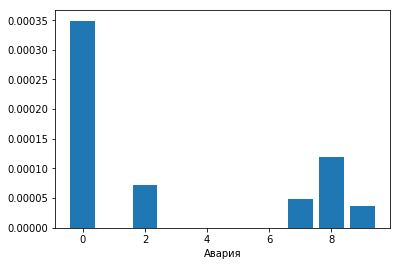

In [408]:
x = np.arange(10)
plt.bar(x, final_df['авария'])
plt.xlabel('Авария')
plt.show()

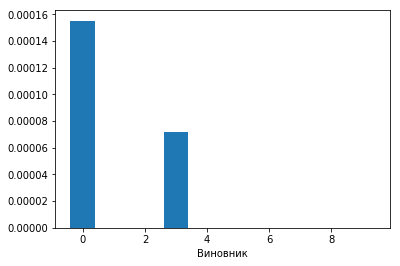

In [409]:
x = np.arange(10)
plt.bar(x, final_df['виновник'])
plt.xlabel('Виновник')
plt.show()

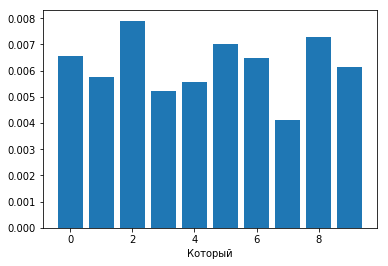

In [410]:
x = np.arange(10)
plt.bar(x, final_df['который'])
plt.xlabel('Который')
plt.show()

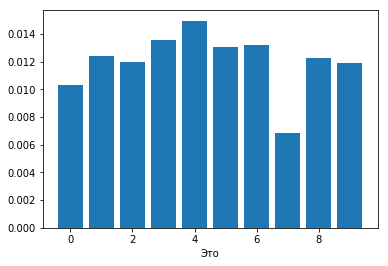

In [411]:
x = np.arange(10)
plt.bar(x, final_df['это'])
plt.xlabel('Это')
plt.show()

# Отличаются ли диаграммы для самых частотных в языке слов и для слов с высоким tf.idf в Вашем списке, если отличаются, то чем?

Да, отличаются. Выборка не совсем сбалансирована, поэтому графики частотных слов очень отличаются от слов с высоким tf-idf. Последние встречаются не во всех текстах, но если встречаются, то их частота в этом тексте высокая. Частотные слова появляются в текстах примерно равномерно.